In [2]:
import pandas as pd
import numpy as np
import chardet

In [3]:
companies = pd.read_csv("companies.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [4]:
with open("companies.csv", 'rb') as file:
    print(chardet.detect(file.read(2000)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
companies = pd.read_csv("companies.csv", encoding='ISO-8859-1')

In [127]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [128]:
companies.describe()

permalink   name                homepage_url  \
count                        66368  66367                       61310   
unique                       66368  66099                       61191   
top     /organization/summa-health  Roost  http://www.askforoffer.com   
freq                             1      4                           5   

       category_list     status country_code state_code       region  \
count          63220      66368        59410      57821        58338   
unique         27296          4          137        311         1092   
top         Software  operating          USA         CA  SF Bay Area   
freq            3995      53034        37601      12900         8804   

                 city  founded_at  
count           58340       51147  
unique           5111        3978  
top     San Francisco  01-01-2012  
freq             3526        2730

In [6]:
companies.head()

permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

In [7]:
companies.isnull().sum(axis=0) * 100 / len(companies)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

<h4>*Checking above, the values in all columns which has the highest unique values*</h4>

In [8]:
companies.shape

(66368, 10)

In [10]:
companies['permalink'] = companies['permalink'].astype("string").str.lower()

In [11]:
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')

<h4>*How many unique companies are present in companies?*</h4>

In [12]:
len(list(companies['permalink'].unique()))

66368

In [19]:
rounds = pd.read_csv("rounds2.csv", encoding='ISO-8859-1')

In [129]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [131]:
rounds.describe()/1000000

raised_amount_usd
count           0.094959
mean           10.426869
std           114.821248
min             0.000000
25%             0.322500
50%             1.680511
75%             7.000000
max         21271.935000

In [20]:
rounds.head()

company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

In [21]:
rounds.shape

(114949, 6)

In [22]:
rounds['company_permalink'] = rounds['company_permalink'].astype("string").str.lower()

In [24]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

<h4>*How many unique companies are present in rounds2?*</h4>

In [25]:
len(list(rounds['company_permalink'].unique()))

66368

<h4>*get the difference between two column from two different tables*</h4>

In [26]:
setcomp = set(list(companies['permalink'].unique()))

In [27]:
setround = set(list(rounds['company_permalink'].unique()))

In [28]:
diff_res = setround.difference(setcomp)

In [29]:
len(diff_res)

0

#### There are no difference in the primary key column

<h4>*As it is to add all column from companies to rounds2, I have removed set_index and added as it is*</h4>

In [30]:
master_frame = pd.merge(rounds, companies, how='inner', left_on='company_permalink', right_on='permalink')

In [39]:
master_frame = master_frame.drop(columns=['permalink'], axis=1)

#### 'permalink' has the replication of 'company_permalink', so we deleted it.

In [40]:
master_frame.shape

(114949, 15)

<h3> Table 2.1 </h3>

In [124]:
master_frame.describe()/1000000     #in millions

raised_amount_usd
count           0.057517
mean            9.732213
std            83.329424
min             0.000000
25%             0.530000
50%             2.500000
75%             9.000000
max         17600.000000

In [41]:
master_frame.head()

company_permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2               /organization/-qounter   
3  /organization/-the-one-of-them-inc-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd                    name  \
0                  B  05-01-2015         10000000.0                   #fame   
1                  A  14-10-2014                NaN                :Qounter   
2                NaN  01-03-2014           700000.0                :Qounter   
3                  B  30-01-2014          3406878.0  (THE) ONE of THEM,Inc.   
4                  A  19-03-2008          2000000.0                 0-6.com   

             homepage_url                                      category_list  \
0      http://livfame.com                                              Media   
1  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
2  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
3     http://oneofthem.jp                                  Apps|Games|Mobile   
4      http://www.0-6.com                                        Curated Web   

      status country_code state_code      region           city  founded_at  
0  operating          IND         16      Mumbai         Mumbai         NaN  
1  operating          USA         DE  DE - Other  Delaware City  04-09-2014  
2  operating          USA         DE  DE - Other  Delaware City  04-09-2014  
3  operating          NaN        NaN         NaN            NaN         NaN  
4  operating          CHN         22     Beijing        Beijing  01-01-2007

In [126]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57517 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57517 non-null  float64
 1   company_permalink   57517 non-null  string 
 2   funding_round_type  57517 non-null  string 
 3   category_list       57190 non-null  string 
 4   country_code        57517 non-null  string 
 5   name                57516 non-null  string 
 6   main_category       57517 non-null  object 
dtypes: float64(1), object(1), string(5)
memory usage: 3.5+ MB


In [42]:
round(100 * (master_frame.isnull().sum(axis=0)/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### Taking the required columns

In [43]:
master_frame = master_frame.loc[:,['raised_amount_usd', 'company_permalink', 'funding_round_type', 'category_list', 'country_code', 'name']]

In [45]:
round((master_frame.isnull().sum() * 100) / len(master_frame), 2)

raised_amount_usd     17.39
company_permalink      0.00
funding_round_type     0.00
category_list          2.97
country_code           7.55
name                   0.00
dtype: float64

In [47]:
master_frame['company_permalink'] = master_frame['company_permalink'].astype("string")

In [48]:
master_frame['funding_round_type'] = master_frame['funding_round_type'].astype("string")

In [50]:
master_frame['category_list'] = master_frame['category_list'].astype("string")

In [51]:
master_frame['country_code'] = master_frame['country_code'].astype("string")

In [52]:
master_frame['name'] = master_frame['name'].astype("string")

In [179]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57517 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57517 non-null  float64
 1   company_permalink   57517 non-null  string 
 2   funding_round_type  57517 non-null  string 
 3   category_list       57190 non-null  string 
 4   country_code        57517 non-null  string 
 5   name                57516 non-null  string 
 6   main_category       57517 non-null  object 
dtypes: float64(1), object(1), string(5)
memory usage: 3.5+ MB


#### raised_amount_usd    - cleaning the null value which as the highest missing values.

In [72]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [54]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') |
                          (master_frame['funding_round_type'] == 'angel') | 
                          (master_frame['funding_round_type'] == 'seed') | 
                          (master_frame['funding_round_type'] == 'private_equity')]


In [57]:
master_frame.groupby('funding_round_type').mean('raised_amount_usd')/1000000  #in millions

raised_amount_usd
funding_round_type                   
angel                        0.958694
private_equity              73.308593
seed                         0.719818
venture                     11.748949

In [137]:
master_frame.groupby('funding_round_type').mean('raised_amount_usd')/1000000

raised_amount_usd
funding_round_type                   
angel                        0.847968
private_equity              62.761636
seed                         0.835389
venture                     11.716344

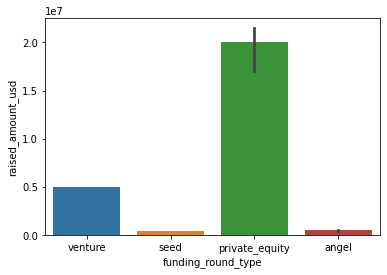

In [142]:
sns.barplot(x='funding_round_type',y='raised_amount_usd', data = master_frame, estimator=lambda x: np.quantile(x,.5))
plt.show()

In [58]:
master_frame = master_frame.loc[:,['raised_amount_usd', 'company_permalink', 'funding_round_type', 'category_list', 'country_code', 'name']]

<AxesSubplot:>

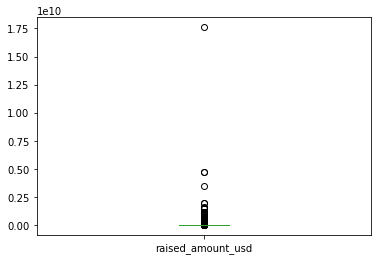

In [60]:
master_frame['raised_amount_usd'].plot.box()

### looks like there is an outlier in 'raised_amount_usd', considering that private equity type also

#### as we have been told in the doubt clearing session .99 or .98 outlier should be removed if the % > 2.
#### if so the below 98 percentile value can be calculated with mean. but I am not gonna do that. I am choosing median

<AxesSubplot:>

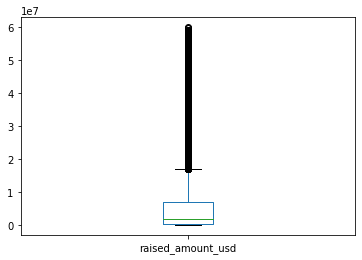

In [73]:
master_frame[master_frame['raised_amount_usd'] < master_frame['raised_amount_usd'].quantile(.98)].plot.box()

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

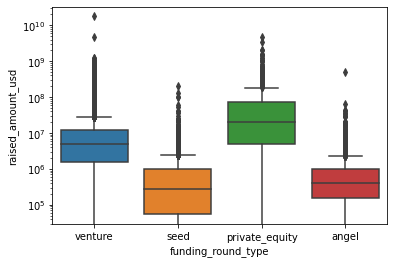

In [90]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

### <font color=red>The million values in median </font></b>

In [92]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.quantile(.5)/1000000, 2)

funding_round_type
angel              0.40
private_equity    20.00
seed               0.28
venture            5.00
Name: raised_amount_usd, dtype: float64

<AxesSubplot:xlabel='funding_round_type'>

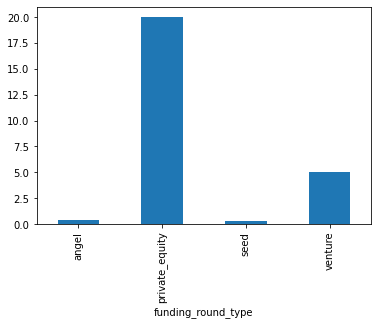

In [93]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.quantile(.5)/1000000, 2).plot.bar()

<b> The million values in average </b>

In [86]:
round(master_frame.groupby('funding_round_type').mean()/1000000, 2)

raised_amount_usd
funding_round_type                   
angel                            0.96
private_equity                  73.31
seed                             0.72
venture                         11.75

### There are higher values in mean function than the median.

#### ATG	BHS	BRB	BLZ	BWA	BDI	CMR	CAN	DMA	SWZ	FJI	GMB	GHA	GRD	GUY	IND	IRL	JAM	KEN	KIR	LSO	LBR	MWI	MLT	MHL	FSM	NAM	NRU	NGA	PAK	PLW	PNG	PHL	KNA	LCA	VCT	WSM	SYC	SLE	SGP	SLB	ZAF	SSD	SDN	TZA	TON	TTO	TUV	VUT	ZMB	ZWE
#### above are the countries that speak english

In [94]:
top9 = master_frame.pivot_table(values='raised_amount_usd', index="country_code", aggfunc=sum) 

In [95]:
top9 = top9.sort_values(by='raised_amount_usd', ascending=False)

In [143]:
top9 = top9.iloc[:9]/1000000

<AxesSubplot:ylabel='country_code'>

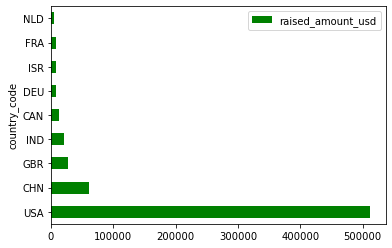

In [536]:
top9.plot.barh(color='g')

#### USA is speaking English but not CHN (china is not speaking english as given in Wikipedia) and GBR speaks and then india

In [150]:
master_frame.head(10)

raised_amount_usd                         company_permalink  \
0          10000000.0                       /organization/-fame   
2            700000.0                    /organization/-qounter   
9           3000000.0                      /organization/0xdata   
10         20000000.0                      /organization/0xdata   
11          1700000.0                      /organization/0xdata   
12          8900000.0                      /organization/0xdata   
13           150000.0                           /organization/1   
15          1000050.0                           /organization/1   
21          6000000.0  /organization/1-800-publicrelations-inc-   
22          5000000.0                /organization/1-mainstream   

   funding_round_type                                      category_list  \
0             venture                                              Media   
2                seed  Application Platforms|Real Time|Social Network...   
9                seed                                          Analytics   
10            venture                                          Analytics   
11            venture                                          Analytics   
12            venture                                          Analytics   
13               seed                                             Mobile   
15               seed                                             Mobile   
21     private_equity          Internet Marketing|Media|Public Relations   
22            venture                   Apps|Cable|Distribution|Software   

   country_code                         name          main_category  
0           IND                        #fame                  Media  
2           USA                     :Qounter  Application Platforms  
9           USA                       H2O.ai              Analytics  
10          USA                       H2O.ai              Analytics  
11          USA                       H2O.ai              Analytics  
12          USA                       H2O.ai              Analytics  
13          USA                     One Inc.                 Mobile  
15          USA                     One Inc.                 Mobile  
21          USA  1-800-PublicRelations, Inc.     Internet Marketing  
22          USA                 1 Mainstream                   Apps

In [151]:
master_frame['main_category'] = master_frame.loc[:,('category_list')].apply(lambda x: str(x).split("|")[0] if '|' in str(x) else str(x))

In [152]:
cc = ['USA', 'GBR', 'IND']   #top 3 countries that speaks english

In [153]:
master_frame = master_frame[master_frame.country_code.isin(cc)]

### Since only top three countries the client considering for investment, lets keep only top three

In [154]:
master_frame.head()

raised_amount_usd       company_permalink funding_round_type  \
0          10000000.0     /organization/-fame            venture   
2            700000.0  /organization/-qounter               seed   
9           3000000.0    /organization/0xdata               seed   
10         20000000.0    /organization/0xdata            venture   
11          1700000.0    /organization/0xdata            venture   

                                        category_list country_code      name  \
0                                               Media          IND     #fame   
2   Application Platforms|Real Time|Social Network...          USA  :Qounter   
9                                           Analytics          USA    H2O.ai   
10                                          Analytics          USA    H2O.ai   
11                                          Analytics          USA    H2O.ai   

            main_category  
0                   Media  
2   Application Platforms  
9               Analytics  
10              Analytics  
11              Analytics

In [155]:
mapping = pd.read_csv("mapping.csv")

In [156]:
mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [157]:
mapping.describe()

Automotive & Sports      Blanks  Cleantech / Semiconductors  \
count           688.000000  688.000000                  688.000000   
mean              0.031977    0.001453                    0.077035   
std               0.176066    0.038125                    0.266841   
min               0.000000    0.000000                    0.000000   
25%               0.000000    0.000000                    0.000000   
50%               0.000000    0.000000                    0.000000   
75%               0.000000    0.000000                    0.000000   
max               1.000000    1.000000                    1.000000   

       Entertainment      Health  Manufacturing  News, Search and Messaging  \
count     688.000000  688.000000     688.000000                  688.000000   
mean        0.129360    0.091570       0.058140                    0.104651   
std         0.335843    0.288627       0.234177                    0.306326   
min         0.000000    0.000000       0.000000                    0.000000   
25%         0.000000    0.000000       0.000000                    0.000000   
50%         0.000000    0.000000       0.000000                    0.000000   
75%         0.000000    0.000000       0.000000                    0.000000   
max         1.000000    1.000000       1.000000                    1.000000   

           Others  Social, Finance, Analytics, Advertising  
count  688.000000                               688.000000  
mean     0.283430                                 0.222384  
std      0.450991                                 0.416150  
min      0.000000                                 0.000000  
25%      0.000000                                 0.000000  
50%      0.000000                                 0.000000  
75%      1.000000                                 0.000000  
max      1.000000                                 1.000000

#### as it is a wide format, we should convert into long format.

In [159]:
mapping.shape

(688, 10)

In [160]:
mapping = mapping.drop(columns=['Blanks'])

In [161]:
varcols = list(mapping.columns[1:])

In [162]:
varcols2 = list(np.setdiff1d(mapping.columns, varcols))

In [163]:
print(varcols2)

['category_list']


In [164]:
mapping = pd.melt(mapping, id_vars=varcols2, value_vars=varcols)

In [165]:
mapping.head(5)

category_list             variable  value
0            NaN  Automotive & Sports      0
1             3D  Automotive & Sports      0
2    3D Printing  Automotive & Sports      0
3  3D Technology  Automotive & Sports      0
4     Accounting  Automotive & Sports      0

In [166]:
mapping = mapping[mapping['category_list']!='NaN']

In [167]:
mapping = mapping[mapping['value'] ==1]

In [92]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.quantile(.5)/1000000, 2)

funding_round_type
angel              0.40
private_equity    20.00
seed               0.28
venture            5.00
Name: raised_amount_usd, dtype: float64

In [ ]:
mapping

In [168]:
mapping.shape

(687, 3)

In [169]:
mapping.head(5)

category_list             variable  value
8   Adventure Travel  Automotive & Sports      1
14         Aerospace  Automotive & Sports      1
45              Auto  Automotive & Sports      1
46   Automated Kiosk  Automotive & Sports      1
47        Automotive  Automotive & Sports      1

In [170]:
mapping.dropna(inplace=True)
mapping.reset_index(drop=True, inplace=True)

In [171]:
mapping.head()

category_list             variable  value
0  Adventure Travel  Automotive & Sports      1
1         Aerospace  Automotive & Sports      1
2              Auto  Automotive & Sports      1
3   Automated Kiosk  Automotive & Sports      1
4        Automotive  Automotive & Sports      1

In [172]:
mapping = mapping.iloc[:,0:2]

In [173]:
mapping.head()

category_list             variable
0  Adventure Travel  Automotive & Sports
1         Aerospace  Automotive & Sports
2              Auto  Automotive & Sports
3   Automated Kiosk  Automotive & Sports
4        Automotive  Automotive & Sports

In [174]:
mapping = mapping.rename(columns={'variable':'main_sector'})

In [177]:
mapping.head()

category_list          main_sector
0  Adventure Travel  Automotive & Sports
1         Aerospace  Automotive & Sports
2              Auto  Automotive & Sports
3   Automated Kiosk  Automotive & Sports
4        Automotive  Automotive & Sports

In [185]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 10.9+ KB


In [186]:
mapping.category_list = mapping.category_list.astype("string")

In [187]:
mapping.main_sector = mapping.main_sector.astype("string")

In [188]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    string
 1   main_sector    687 non-null    string
dtypes: string(2)
memory usage: 10.9 KB


In [178]:
master_frame.head()

raised_amount_usd       company_permalink funding_round_type  \
0          10000000.0     /organization/-fame            venture   
2            700000.0  /organization/-qounter               seed   
9           3000000.0    /organization/0xdata               seed   
10         20000000.0    /organization/0xdata            venture   
11          1700000.0    /organization/0xdata            venture   

                                        category_list country_code      name  \
0                                               Media          IND     #fame   
2   Application Platforms|Real Time|Social Network...          USA  :Qounter   
9                                           Analytics          USA    H2O.ai   
10                                          Analytics          USA    H2O.ai   
11                                          Analytics          USA    H2O.ai   

            main_category  
0                   Media  
2   Application Platforms  
9               Analytics  
10              Analytics  
11              Analytics

In [176]:
mapping.head()

category_list          main_sector
0  Adventure Travel  Automotive & Sports
1         Aerospace  Automotive & Sports
2              Auto  Automotive & Sports
3   Automated Kiosk  Automotive & Sports
4        Automotive  Automotive & Sports

### Prepare for Joining the table by Category_list and Main_category

In [181]:
master_frame.main_category = master_frame.main_category.astype('string')

In [182]:
master_frame.main_category = master_frame.main_category.str.lower()

In [184]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57517 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57517 non-null  float64
 1   company_permalink   57517 non-null  string 
 2   funding_round_type  57517 non-null  string 
 3   category_list       57190 non-null  string 
 4   country_code        57517 non-null  string 
 5   name                57516 non-null  string 
 6   main_category       57517 non-null  string 
dtypes: float64(1), string(6)
memory usage: 3.5 MB


In [189]:
mapping.head(5)

category_list          main_sector
0  Adventure Travel  Automotive & Sports
1         Aerospace  Automotive & Sports
2              Auto  Automotive & Sports
3   Automated Kiosk  Automotive & Sports
4        Automotive  Automotive & Sports

In [458]:
mapping.category_list.astype('string')

0       Adventure Travel
1              Aerospace
2                   Auto
3        Automated Kiosk
4             Automotive
             ...        
682    Social Recruiting
683    Social Television
684        Social Travel
685      Stock Exchanges
686      Venture Capital
Name: category_list, Length: 687, dtype: string

In [191]:
mapping.category_list = mapping.category_list.str.lower()

In [481]:
mapping.category_list

0       adventure travel
1              aerospace
2                   auto
3        automated kiosk
4             automotive
             ...        
682    social recruiting
683    social television
684        social travel
685      stock exchanges
686      venture capital
Name: category_list, Length: 687, dtype: object

In [215]:
mapdiff = list(mapping.category_list.unique())
mf_selecteddiff = list(master_frame.main_category.unique())
len(list(set(mapdiff) - set(mf_selecteddiff))), "is the difference from mapping and master_frame column 'category_list' value"

(52,
 "is the difference from mapping and master_frame column 'category_list' value")

In [217]:
print(list(set(mapdiff) - set(mf_selecteddiff)))

['licensing', 'multi-level marketing', 'fuel cells', 'women', 'virtual workforces', 'social bookmarking', 'social business', 'flash sales', 'group sms', 'casual games', 'energy storage', 'lotteries', 'neuroscience', 'china internet', 'tea', 'flowers', 'usability', 'sns', 'shared services', 'face recognition', 'monetization', 'stock exchanges', 'wholesale', 'performance marketing', 'musical instruments', 'micro-enterprises', 'productivity', 'fmcg', 'ride sharing', 'universities', 'natural resources', 'renewable tech', 'b2b express delivery', 'social recruiting', 'high school students', 'low bid auctions', 'smart grid', 'promotional', 'boating industry', 'homeless shelter', 'building owners', 'plumbers', 'ict', 'impact investing', 'film distribution', 'pre seed', 'pervasive computing', 'speech recognition', 'biomass power generation', 'social television', 'taxis', 'veterinary']


In [203]:
mapping[mapping['category_list'].str.contains('0')]

category_list                              main_sector
44               energy ma0gement               Cleantech / Semiconductors
61                  0notechnology               Cleantech / Semiconductors
62     0tural language processing               Cleantech / Semiconductors
63               0tural resources               Cleantech / Semiconductors
71                waste ma0gement               Cleantech / Semiconductors
98       digital rights ma0gement                            Entertainment
99                 digital sig0ge                            Entertainment
102              educatio0l games                            Entertainment
106               event ma0gement                            Entertainment
165           alter0tive medicine                                   Health
174                       can0bis                                   Health
204          medical professio0ls                                   Health
213                perso0l health                                   Health
226                     veteri0ry                                   Health
283                 chi0 internet               News, Search and Messaging
289               cloud ma0gement               News, Search and Messaging
309                     jour0lism               News, Search and Messaging
319                     0vigation               News, Search and Messaging
329        professio0l networking               News, Search and Messaging
350            document ma0gement                                   Others
360                enterprise 2.0                                   Others
372               fleet ma0gement                                   Others
382                     gover0nce                                   Others
403  intellectual asset ma0gement                                   Others
411                  it ma0gement                                   Others
414           knowledge ma0gement                                   Others
419                lead ma0gement                                   Others
457                  perso0l data                                   Others
458                perso0lization                                   Others
476          professio0l services                                   Others
477             project ma0gement                                   Others
506        supply chain ma0gement                                   Others
510                task ma0gement                                   Others
540                      a0lytics  Social, Finance, Analytics, Advertising
550             big data a0lytics  Social, Finance, Analytics, Advertising
555             business a0lytics  Social, Finance, Analytics, Advertising
561              career ma0gement  Social, Finance, Analytics, Advertising
577             contact ma0gement  Social, Finance, Analytics, Advertising
614                        fi0nce  Social, Finance, Analytics, Advertising
615             fi0nce technology  Social, Finance, Analytics, Advertising
616            fi0ncial exchanges  Social, Finance, Analytics, Advertising
617             fi0ncial services  Social, Finance, Analytics, Advertising
624            identity ma0gement  Social, Finance, Analytics, Advertising
634          innovation ma0gement  Social, Finance, Analytics, Advertising
638          investment ma0gement  Social, Finance, Analytics, Advertising
645               mobile a0lytics  Social, Finance, Analytics, Advertising
656              perso0l branding  Social, Finance, Analytics, Advertising
657                perso0l fi0nce  Social, Finance, Analytics, Advertising
659           predictive a0lytics  Social, Finance, Analytics, Advertising
661                    promotio0l  Social, Finance, Analytics, Advertising
662            property ma0gement  Social, Finance, Analytics, Advertising
666                risk ma0gement  Social, Finance, Analytics, Advertising
677        social media ma0gement  Social, Fi

### seeing some of the values as 0 instead of na. ex: Ma0gement, A0lytics, fi0nce and other some, avoiding 2.0 (enterprise 2.0)

#### in the above result, energy ma0gement	 index-44, is having 0, so checking 44th index for confirming that it is modified

In [219]:
mapping.category_list.apply(lambda x: x if "2.0" in x else x.replace("0","na"))[44]

'energy management'

In [220]:
mapping.category_list = mapping.category_list.apply(lambda x: x if "2.0" in x else x.replace("0","na"))

In [221]:
mapdiff = list(mapping.category_list.unique())
mf_selecteddiff = list(master_frame.main_category.unique())
len(list(set(mapdiff) - set(mf_selecteddiff))), "is the difference from mapping and master_frame column 'category_list' value"

(52,
 "is the difference from mapping and master_frame column 'category_list' value")

In [224]:
list(set(mapdiff) - set(mf_selecteddiff))

['licensing',
 'multi-level marketing',
 'fuel cells',
 'women',
 'virtual workforces',
 'social bookmarking',
 'social business',
 'flash sales',
 'group sms',
 'casual games',
 'energy storage',
 'lotteries',
 'neuroscience',
 'china internet',
 'tea',
 'flowers',
 'usability',
 'sns',
 'shared services',
 'face recognition',
 'monetization',
 'stock exchanges',
 'wholesale',
 'performance marketing',
 'musical instruments',
 'micro-enterprises',
 'productivity',
 'fmcg',
 'ride sharing',
 'universities',
 'natural resources',
 'renewable tech',
 'b2b express delivery',
 'social recruiting',
 'high school students',
 'low bid auctions',
 'smart grid',
 'promotional',
 'boating industry',
 'homeless shelter',
 'building owners',
 'plumbers',
 'ict',
 'impact investing',
 'film distribution',
 'pre seed',
 'pervasive computing',
 'speech recognition',
 'biomass power generation',
 'social television',
 'taxis',
 'veterinary']

#### couldn't identify something we can clear on the above list, so calculate the % of these values and ignore it.

In [225]:
len(mapdiff) , " " , len(mf_selecteddiff)

(687, ' ', 656)

In [226]:
master_frame.head()

raised_amount_usd       company_permalink funding_round_type  \
0          10000000.0     /organization/-fame            venture   
2            700000.0  /organization/-qounter               seed   
9           3000000.0    /organization/0xdata               seed   
10         20000000.0    /organization/0xdata            venture   
11          1700000.0    /organization/0xdata            venture   

                                        category_list country_code      name  \
0                                               Media          IND     #fame   
2   Application Platforms|Real Time|Social Network...          USA  :Qounter   
9                                           Analytics          USA    H2O.ai   
10                                          Analytics          USA    H2O.ai   
11                                          Analytics          USA    H2O.ai   

            main_category  
0                   media  
2   application platforms  
9               analytics  
10              analytics  
11              analytics

In [228]:
mapping.head()

category_list          main_sector
0  adventure travel  Automotive & Sports
1         aerospace  Automotive & Sports
2              auto  Automotive & Sports
3   automated kiosk  Automotive & Sports
4        automotive  Automotive & Sports

In [229]:
mapping = mapping.rename(columns={'category_list':'main_category'})

In [230]:
mapping.head()

main_category          main_sector
0  adventure travel  Automotive & Sports
1         aerospace  Automotive & Sports
2              auto  Automotive & Sports
3   automated kiosk  Automotive & Sports
4        automotive  Automotive & Sports

In [231]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57517 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57517 non-null  float64
 1   company_permalink   57517 non-null  string 
 2   funding_round_type  57517 non-null  string 
 3   category_list       57190 non-null  string 
 4   country_code        57517 non-null  string 
 5   name                57516 non-null  string 
 6   main_category       57517 non-null  string 
dtypes: float64(1), string(6)
memory usage: 3.5 MB


In [232]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [233]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57190 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57190 non-null  float64
 1   company_permalink   57190 non-null  string 
 2   funding_round_type  57190 non-null  string 
 3   category_list       57190 non-null  string 
 4   country_code        57190 non-null  string 
 5   name                57189 non-null  string 
 6   main_category       57190 non-null  string 
dtypes: float64(1), string(6)
memory usage: 3.5 MB


In [234]:
master_frame = master_frame[~master_frame.name.isnull()]

In [235]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57189 entries, 0 to 114947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57189 non-null  float64
 1   company_permalink   57189 non-null  string 
 2   funding_round_type  57189 non-null  string 
 3   category_list       57189 non-null  string 
 4   country_code        57189 non-null  string 
 5   name                57189 non-null  string 
 6   main_category       57189 non-null  string 
dtypes: float64(1), string(6)
memory usage: 3.5 MB


In [238]:
master_frame.category_list = master_frame.main_category.str.lower()

In [241]:
master_frame.head()

raised_amount_usd       company_permalink funding_round_type  \
0          10000000.0     /organization/-fame            venture   
2            700000.0  /organization/-qounter               seed   
9           3000000.0    /organization/0xdata               seed   
10         20000000.0    /organization/0xdata            venture   
11          1700000.0    /organization/0xdata            venture   

            category_list country_code      name          main_category  
0                   media          IND     #fame                  media  
2   application platforms          USA  :Qounter  application platforms  
9               analytics          USA    H2O.ai              analytics  
10              analytics          USA    H2O.ai              analytics  
11              analytics          USA    H2O.ai              analytics

In [242]:
master_frame.tail()

raised_amount_usd     company_permalink funding_round_type  \
114935           875000.0   /organization/zyrra              angel   
114936          8500000.0  /organization/zystor            venture   
114939           400000.0   /organization/zzish              angel   
114940           320000.0   /organization/zzish               seed   
114947            18192.0  /organization/asys-2               seed   

               category_list country_code    name         main_category  
114935            e-commerce          USA   Zyrra            e-commerce  
114936         biotechnology          USA  Zystor         biotechnology  
114939             analytics          GBR   Zzish             analytics  
114940             analytics          GBR   Zzish             analytics  
114947  consumer electronics          USA  Ãasys  consumer electronics

#### looks like name column has some unwanted character. lets encode is properly

In [243]:
master_frame.name = master_frame.name.str.encode('utf8').str.decode('ascii', 'ignore')

#### just making sure that no raw/unwanted character is present on this column 'main_category'

In [247]:
master_frame.main_category = master_frame.main_category.str.encode('utf8').str.decode('ascii', 'ignore')

In [248]:
master_frame.tail()

raised_amount_usd     company_permalink funding_round_type  \
114935           875000.0   /organization/zyrra              angel   
114936          8500000.0  /organization/zystor            venture   
114939           400000.0   /organization/zzish              angel   
114940           320000.0   /organization/zzish               seed   
114947            18192.0  /organization/asys-2               seed   

               category_list country_code    name         main_category  
114935            e-commerce          USA   Zyrra            e-commerce  
114936         biotechnology          USA  Zystor         biotechnology  
114939             analytics          GBR   Zzish             analytics  
114940             analytics          GBR   Zzish             analytics  
114947  consumer electronics          USA    asys  consumer electronics

### both the table has main_category column as common and we have cleaned the data and converted to lower case for merging

In [249]:
master_frame = master_frame.merge(mapping, on='main_category', how='left')

In [250]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57189 entries, 0 to 57188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57189 non-null  float64
 1   company_permalink   57189 non-null  string 
 2   funding_round_type  57189 non-null  string 
 3   category_list       57189 non-null  string 
 4   country_code        57189 non-null  string 
 5   name                57189 non-null  object 
 6   main_category       57189 non-null  object 
 7   main_sector         57163 non-null  string 
dtypes: float64(1), object(2), string(5)
memory usage: 3.9+ MB


In [254]:
master_frame[master_frame.main_sector.isnull()]

raised_amount_usd                              company_permalink  \
1312             60000.0                        /organization/adora-inc   
6965           2370000.0                        /organization/blurr-llc   
8888            250000.0                         /organization/carusele   
10270           125000.0          /organization/clean-vehicle-solutions   
10465          1000000.0                      /organization/clientscape   
14481           250000.0          /organization/dolores-speech-products   
16599            50000.0                     /organization/esports-hero   
17784         68569234.0                    /organization/fia-formula-e   
18157        194000000.0                       /organization/five-below   
19758           283512.0                      /organization/get-invited   
21753          9486929.0                       /organization/healthtell   
25876           862000.0                       /organization/justinmind   
31084            60000.0                        /organization/mistlayer   
31085             2000.0                        /organization/mistlayer   
34756          3172815.0             /organization/omega-point-research   
34875          3400000.0             /organization/onboard-dynamics-inc   
38053            49500.0                      /organization/playfitness   
43856          2499999.0                  /organization/sense-labs-inc-   
44211          1100000.0       /organization/shantiniketan-incorporated   
44212          2000000.0       /organization/shantiniketan-incorporated   
45014            25000.0                          /organization/sincuru   
52905          1420000.0                         /organization/velocomp   
55586            18000.0                      /organization/worldwinger   
55587            25000.0                      /organization/worldwinger   
56154           300000.0  /organization/yellowstone-compact-commodities   
56155            30000.0  /organization/yellowstone-compact-commodities   

      funding_round_type                    category_list country_code  \
1312                seed                  cause marketing          USA   
6965                seed                   generation y-z          USA   
8888                seed         social media advertising          USA   
10270            venture                 natural gas uses          USA   
10465              angel              internet technology          USA   
14481            venture               adaptive equipment          USA   
16599              angel                     skill gaming          USA   
17784            venture                           racing          GBR   
18157            venture                 specialty retail          USA   
19758               seed                       registrars          GBR   
21753            venture  biotechnology and semiconductor          USA   
25876            venture                rapidly expanding          USA   
31084              angel              enterprise hardware          IND   
31085               seed              enterprise hardware          IND   
34756            venture                   product search          USA   
34875               seed                 natural gas uses          USA   
38053               seed                           kinect          USA   
43856            venture                        greentech          USA   
44211            venture                       retirement          USA   
44212            venture                       retirement          USA   
45014               seed          subscription businesses          GBR   
52905            venture               adaptive equipment          USA   
55586               seed      deep information technology          USA   
55587               seed      deep information technology          USA   
56154               seed                   golf equipment          USA   
56155               seed                   golf equipment

In [255]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57189 entries, 0 to 57188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57189 non-null  float64
 1   company_permalink   57189 non-null  string 
 2   funding_round_type  57189 non-null  string 
 3   category_list       57189 non-null  string 
 4   country_code        57189 non-null  string 
 5   name                57189 non-null  object 
 6   main_category       57189 non-null  object 
 7   main_sector         57163 non-null  string 
dtypes: float64(1), object(2), string(5)
memory usage: 3.9+ MB


In [256]:
master_frame.isnull().sum() * 100 / len(master_frame)

raised_amount_usd     0.000000
company_permalink     0.000000
funding_round_type    0.000000
category_list         0.000000
country_code          0.000000
name                  0.000000
main_category         0.000000
main_sector           0.045463
dtype: float64

### we can omit the main_sector null values since it is in the fraction of missing %.

In [257]:
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [258]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57163 entries, 0 to 57188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57163 non-null  float64
 1   company_permalink   57163 non-null  string 
 2   funding_round_type  57163 non-null  string 
 3   category_list       57163 non-null  string 
 4   country_code        57163 non-null  string 
 5   name                57163 non-null  object 
 6   main_category       57163 non-null  object 
 7   main_sector         57163 non-null  string 
dtypes: float64(1), object(2), string(5)
memory usage: 3.9+ MB


In [259]:
master_frame['main_category'] = master_frame['main_category'].astype("string")

In [260]:
master_frame['name'] = master_frame['name'].astype("string")

In [261]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57163 entries, 0 to 57188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raised_amount_usd   57163 non-null  float64
 1   company_permalink   57163 non-null  string 
 2   funding_round_type  57163 non-null  string 
 3   category_list       57163 non-null  string 
 4   country_code        57163 non-null  string 
 5   name                57163 non-null  string 
 6   main_category       57163 non-null  string 
 7   main_sector         57163 non-null  string 
dtypes: float64(1), string(7)
memory usage: 3.9 MB


#### we should be cleaning up to get < 15 million and > 5 million

In [274]:
c1 = master_frame[(master_frame['country_code'] == 'USA') & 
                  (master_frame['raised_amount_usd'] >= 5000000) & 
                  (master_frame['raised_amount_usd'] <= 15000000) ]

In [275]:
c1.shape

(12544, 8)

In [276]:
c2 = master_frame[(master_frame['country_code'] == 'GBR') & 
                  (master_frame['raised_amount_usd'] >= 5000000) & 
                  (master_frame['raised_amount_usd'] <= 15000000) ]

In [277]:
c2.shape

(656, 8)

In [278]:
c3 = master_frame[(master_frame['country_code'] == 'IND') & 
                  (master_frame['raised_amount_usd'] >= 5000000) & 
                  (master_frame['raised_amount_usd'] <= 15000000) ]

In [279]:
c3.shape

(340, 8)

In [284]:
round(100 * (c1.raised_amount_usd.sum()/1000000000), 2) ##billion

11175.23

In [285]:
round(100 * (c2.raised_amount_usd.sum()/1000000000), 2) ##billion

566.3

In [286]:
round(100 * (c3.raised_amount_usd.sum()/1000000000), 2) ##billion

303.85

In [289]:
c1.main_sector.value_counts()

Others                                     3041
Social, Finance, Analytics, Advertising    2829
Cleantech / Semiconductors                 2466
News, Search and Messaging                 1634
Health                                      965
Manufacturing                               822
Entertainment                               609
Automotive & Sports                         178
Name: main_sector, dtype: Int64

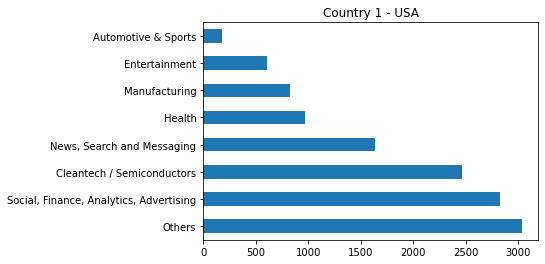

In [357]:
c1.main_sector.value_counts().plot.barh()
plt.title("Country 1 - USA")
plt.show()

In [589]:
c2.main_sector.value_counts()

Others                                     153
Social, Finance, Analytics, Advertising    143
Cleantech / Semiconductors                 133
News, Search and Messaging                  82
Entertainment                               57
Manufacturing                               45
Health                                      26
Automotive & Sports                         17
Name: main_sector, dtype: int64

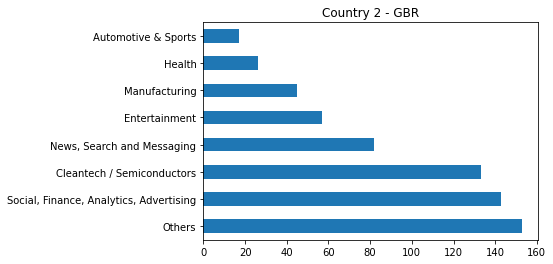

In [294]:
c2.main_sector.value_counts().plot.barh()
plt.title("Country 2 - GBR")
plt.show()

In [592]:
c3.main_sector.value_counts()

Others                                     114
Social, Finance, Analytics, Advertising     64
News, Search and Messaging                  53
Entertainment                               34
Cleantech / Semiconductors                  21
Manufacturing                               21
Health                                      20
Automotive & Sports                         13
Name: main_sector, dtype: int64

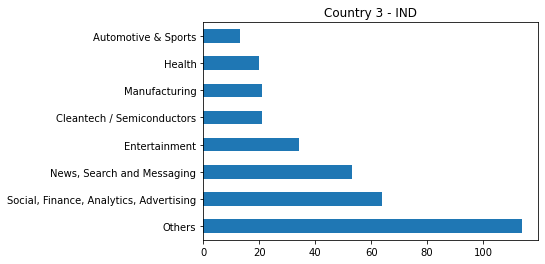

In [537]:
c3.main_sector.value_counts().plot.barh()
plt.title("Country 3 - IND")
plt.show()

In [304]:
c1.main_sector.value_counts()[:3].sum()

8336

In [301]:
c2.main_sector.value_counts()[:3].sum()

429

In [302]:
c3.main_sector.value_counts()[:3].sum()

231

### Checking for the top 1st company in Country 1

In [424]:
T1Compc1 = c1[c1['main_sector']=='Others']
T1Compc1 = T1Compc1.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T1Compc1 = T1Compc1.sort_values(by = 'raised_amount_usd', ascending = False)

In [448]:
T1Compc1.head(1)

raised_amount_usd
company_permalink                           
/organization/virtustream         64300000.0

### Checking for the top 2nd company in Country 1

In [427]:
T2Compc1 = c1[c1['main_sector']=='Social, Finance, Analytics, Advertising']
T2Compc1 = T2Compc1.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T2Compc1 = T2Compc1.sort_values(by = 'raised_amount_usd', ascending = False)

In [447]:
T2Compc1.head(1)

raised_amount_usd
company_permalink                            
/organization/choicestream         73300000.0

### Checking for the top 1st company in Country 2

In [449]:
T1Compc2 = c2[c2['main_sector']=='Others']
T1Compc2 = T1Compc2.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T1Compc2 = T1Compc2.sort_values(by = 'raised_amount_usd', ascending = False)

In [450]:
T1Compc2.head(1)

raised_amount_usd
company_permalink                              
/organization/electric-cloud         37000000.0

### Checking for the top 2nd company in Country 2

In [444]:
T2Compc2 = c2[c2['main_sector']=='Social, Finance, Analytics, Advertising']
T2Compc2 = T2Compc2.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T2Compc2 = T2Compc2.sort_values(by = 'raised_amount_usd', ascending = False)

In [451]:
T2Compc2.head(1)

raised_amount_usd
company_permalink                                     
/organization/celltick-technologies         37500000.0

### Checking for the top 1st company in Country 3

In [452]:
T1Compc3 = c3[c3['main_sector']=='Others']
T1Compc3 = T1Compc3.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T1Compc3 = T1Compc3.sort_values(by = 'raised_amount_usd', ascending = False)

In [453]:
T1Compc3.head(1)

raised_amount_usd
company_permalink                            
/organization/firstcry-com         39000000.0

### Checking for the top 2nd company in Country 3

In [456]:
T2Compc3 = c3[c3['main_sector']=='Social, Finance, Analytics, Advertising']
T2Compc3 = T2Compc3.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
T2Compc3 = T2Compc3.sort_values(by = 'raised_amount_usd', ascending = False)

In [457]:
T2Compc3.head(1)

raised_amount_usd
company_permalink                               
/organization/manthan-systems         50700000.0

<font color = blue>
    
_T1Compc1 - Top 1st sector in country 1_  
_T2Compc1 - Top 2nd sector in country 1_

    
_T1Compc2 - Top 1st sector in country 2_
    
_T2Compc2 - Top 2nd sector in country 2_
    

    
_T1Compc3 - Top 1st sector in country 3_
    
_T2Compc3 - Top 2nd sector in country 3_ </font>

<AxesSubplot:xlabel='company_permalink'>

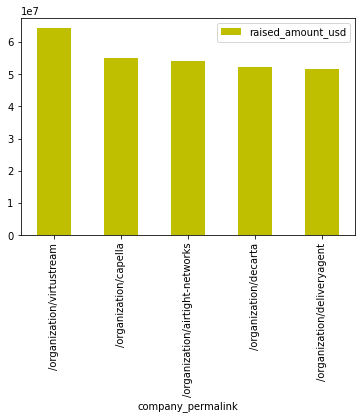

In [426]:
T1Compc1.iloc[:5,:].plot.bar(color='y')

<AxesSubplot:xlabel='company_permalink'>

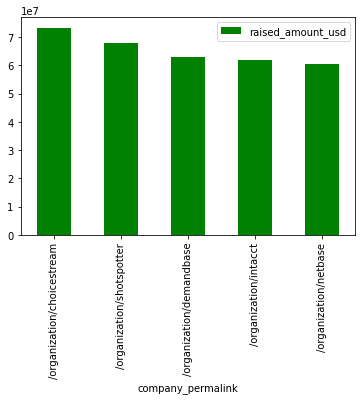

In [429]:
T2Compc1.iloc[:5,:].plot.bar(color='g')

<function matplotlib.pyplot.show(close=None, block=None)>

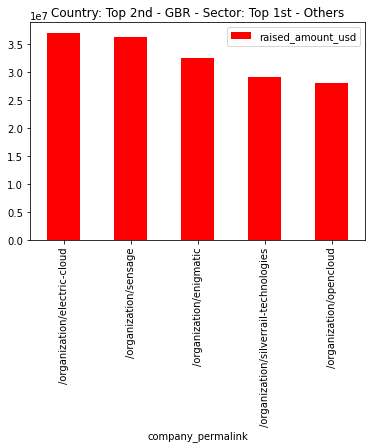

In [443]:
T1Compc2.iloc[:5,:].plot.bar(color='r')
plt.title('Country: Top 2nd - GBR - Sector: Top 1st - Others')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

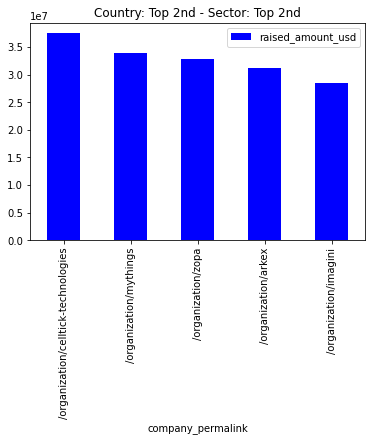

In [446]:
T2Compc2.iloc[:5,:].plot.bar(color='b')
plt.title('Country: Top 2nd - Sector: Top 2nd')
plt.show

In [524]:
c3.raised_amount_usd = c3.raised_amount_usd/1000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [522]:
c2.raised_amount_usd = c2.raised_amount_usd/1000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [500]:
c1.raised_amount_usd = c1.raised_amount_usd/1000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [519]:
c1_pivot = np.round(pd.pivot_table(data=c1,values="raised_amount_usd",index="main_sector", aggfunc=['count',sum]), 2)
c1_pivot

count               sum
                                        raised_amount_usd raised_amount_usd
main_sector                                                                
Automotive & Sports                                   178           1545.52
Cleantech / Semiconductors                           2466          22716.71
Entertainment                                         609           5237.91
Health                                                965           8670.42
Manufacturing                                         822           7453.79
News, Search and Messaging                           1634          14346.37
Others                                               3041          27100.73
Social, Finance, Analytics, Advertising              2829          24680.84

## Above is the stats of sector wise investment for country 1 - USA

In [523]:
c2_pivot = np.round(pd.pivot_table(data=c2,values="raised_amount_usd",index="main_sector", aggfunc=['count',sum]), 2)
c2_pivot

count               sum
                                        raised_amount_usd raised_amount_usd
main_sector                                                                
Automotive & Sports                                    17            173.11
Cleantech / Semiconductors                            133           1189.42
Entertainment                                          57            496.42
Health                                                 26            231.54
Manufacturing                                          45            391.97
News, Search and Messaging                             82            673.99
Others                                                153           1332.94
Social, Finance, Analytics, Advertising               143           1173.56

## Above is the stats of sector wise investment for country 2 - GBR

In [530]:
c3_pivot = np.round(pd.pivot_table(data=c3,values="raised_amount_usd",index="main_sector", aggfunc=['count',sum]), 2)
c3_pivot

count               sum
                                        raised_amount_usd raised_amount_usd
main_sector                                                                
Automotive & Sports                                    13            136.90
Cleantech / Semiconductors                             21            173.98
Entertainment                                          34            293.83
Health                                                 20            173.74
Manufacturing                                          21            200.90
News, Search and Messaging                             53            439.83
Others                                                114           1045.91
Social, Finance, Analytics, Advertising                64            573.45

## Above is the stats of sector wise investment for country 3 - IND

### Checking for the top 1st company in Country 1

In [562]:
Compc1 = c1[(c1['main_sector']=='Others') | (c1['main_sector']=='Social, Finance, Analytics, Advertising')]
Compc2 = c2[(c2['main_sector']=='Others') | (c1['main_sector']=='Social, Finance, Analytics, Advertising')]
Compc3 = c3[(c3['main_sector']=='Others') | (c1['main_sector']=='Social, Finance, Analytics, Advertising')]
#Compc1 = Compc1.pivot_table(index = 'company_permalink', values = 'raised_amount_usd', aggfunc = 'sum')
#Compc1 = Compc1.sort_values(by = 'raised_amount_usd', ascending = False)

<ipython-input-562-92f2d48c7908>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Compc2 = c2[(c2['main_sector']=='Others') | (c1['main_sector']=='Social, Finance, Analytics, Advertising')]
<ipython-input-562-92f2d48c7908>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Compc3 = c3[(c3['main_sector']=='Others') | (c1['main_sector']=='Social, Finance, Analytics, Advertising')]


In [545]:
Compc1.head()

raised_amount_usd                         company_permalink  \
5            8.900000                      /organization/0xdata   
8            6.000000  /organization/1-800-publicrelations-inc-   
36          11.999347              /organization/128-technology   
53          14.000000                 /organization/170-systems   
56           5.000000                     /organization/17zuoye   

   funding_round_type       category_list country_code  \
5             venture           analytics          USA   
8      private_equity  internet marketing          USA   
36            venture   service providers          USA   
53            venture            software          USA   
56            venture           education          USA   

                           name       main_category  \
5                        H2O.ai           analytics   
8   1-800-PublicRelations, Inc.  internet marketing   
36               128 Technology   service providers   
53                  170 Systems            software   
56                      17zuoye           education   

                                main_sector  
5   Social, Finance, Analytics, Advertising  
8   Social, Finance, Analytics, Advertising  
36                                   Others  
53                                   Others  
56                                   Others

Text(0.5, 1.0, 'Country - USA, Top 10 main categories of invested funds in top 2 sectors')

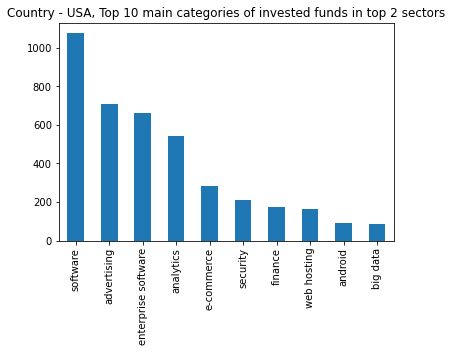

In [559]:
Compc1.main_category.value_counts()[:10].plot.bar()
plt.title("Country - USA, Top 10 main categories of invested funds in top 2 sectors")

Text(0.5, 1.0, 'Country - GBR, Top 10 main categories of invested funds in top 2 sectors')

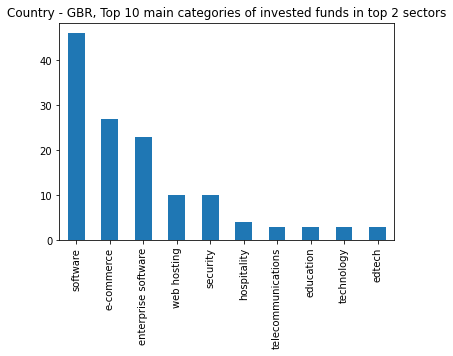

In [561]:
Compc2.main_category.value_counts()[:10].plot.bar()
plt.title("Country - GBR, Top 10 main categories of invested funds in top 2 sectors")

Text(0.5, 1.0, 'Country - IND, Top 10 main categories of invested funds in top 2 sectors')

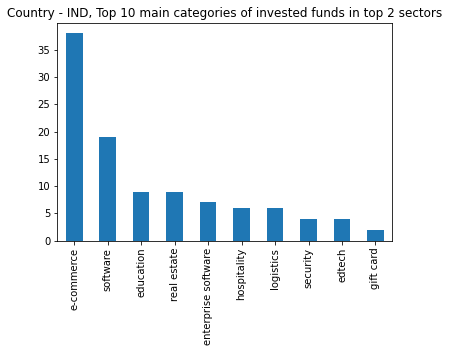

In [574]:
Compc3.main_category.value_counts()[:10].plot.bar()
plt.title("Country - IND, Top 10 main categories of invested funds in top 2 sectors")

Text(0.5, 1.0, '5 to 15 million are invested in these sectors all over the world')

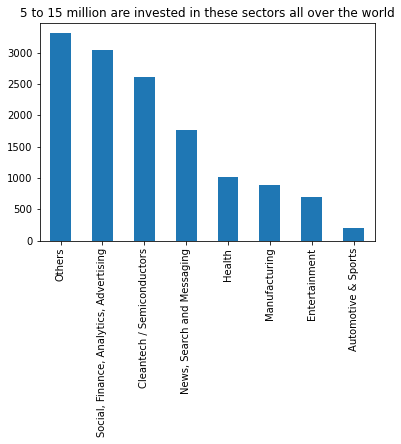

In [567]:
master_frame[((master_frame['raised_amount_usd'] >= 5000000) & 
                  (master_frame['raised_amount_usd'] <= 15000000))].main_sector.value_counts().plot.bar()
plt.title("5 to 15 million are invested in these sectors all over the world")

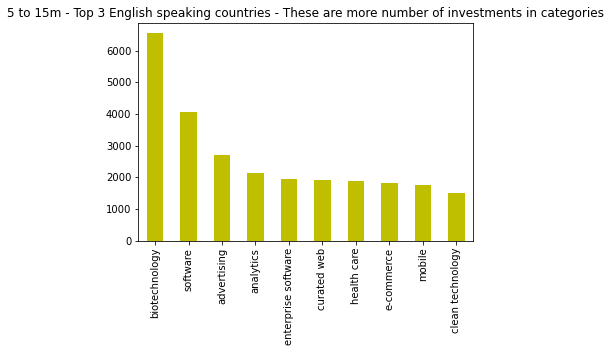

In [581]:
master_frame[((master_frame['country_code'] == 'GBR') |
              (master_frame['country_code'] == 'USA') |
              (master_frame['country_code'] == 'IND') & 
                (master_frame['raised_amount_usd'] >= 5000000) & 
                  (master_frame['raised_amount_usd'] <= 15000000))].main_category.value_counts()[:10].plot.bar(color='y')
plt.title("5 to 15m - Top 3 English speaking countries - These are more number of investments in categories")
plt.show()